# BEHAVIOUR CLONING

### The goals / steps of this project are the following:

1. Use the simulator to collect data of good driving behavior
2. Build, a convolution neural network in Keras that predicts steering angles from images
3. Train and validate the model with a training and validation set
4. Test that the model successfully drives around track one without leaving the road
5. Summarize the results with a written report


# Rubric points

Here I will consider the different points from the rubric and explain how I addressed all of them

## Required Files
The Submission folder consists of the following:
1. drive.py - The same file tht was provided. I did not make changes to this file
2. model.h5 - Saved model after training with the data
3. Model.ipynb - Used to train the model on the Amazon Instance)
4. Model.py - a .py version of the notebook provided above
5. All the pictures used in the report
6. Readme - the writeup explaining ho the project was completed.
7. run1.mp4 - Final project output video showing the car driving in Autonomous mode. (This was run on the Mac simulator at 640X480 resolution at the fastest Graphics quality)

## Quality of Code

### Is the code Funtional

The model provided can be run by using the following code

python drive.py model.h5

### Is the code Readable and usable

Apart from changing the path where the dat is stored the code must be plug and play. The code has the path to the images according to the AWS Instance. And thus this will need to be changed to your local machine before you can run it. 

## Model Architecture and Strategy

The next 4 parts of the rubric are answered in the fllowing order 
1. Training Data - Explaining data collection, augmentation and also giving an example of the kind of data that was collected
2. Model Architecture - this also includes an explaination on how overfitting was addressed
3. Model Training - Explaining how parameters were tuned for learning

## Training Data
Data was collected by driving the car in the in the simulator provided. Multiple data sets were collected and used. The two that gave the best result have been shown in teh code below. All the data sets that were collected are attched in the submission. A brief Description of the data collection techniques and cahllenges faced is given below.

### Data collection

The different data files that were collected are as follows:
1. Anticlockwise on Track - Fast
2. Clockwise on Track - Slow

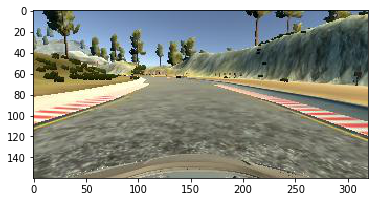

The data sets were collected at different speed slow as well as fast to ensure the vehicle could react to different situations. All the data sets that were finally used are atleast 1 lap long. a combination of the two above was good enough to tbe able to run the car in Autonomous mode and meet the requirements. 

A Python generator was not needed as the data generated was able to run in the memory providede without any problems. Thus a generator was not implemented for this part of the project

### Data Augmentation
Now the data was augmented using two methods

1. Using the left and right Camera Images to exaggerate a recovery Action
2. Using mirror images of all the data 

#### Using Left and right Images
The data collected was based on 3 cameras all facing forward but mounted on three different locations on the car Hood. 

The car is driven using only the center camera. Thus I made teh assumption taht if the center camera saw what the left camera saw then we are veering to the left and thus need to make a motion to the right to come back to the center of the lane. 

Similarly if the image seen in teh right camera is seen in teh center camera then the car is too far right nad should veer left. Thus the data was cahnged to account for this. This tripled the number of data points we have. 

Thus correction added

1. Right image = Turn left by 0.2 Deg (Arbitrary Value)
2. Left Image = turn right by 0.2 Deg
3. Center Image - No Correction

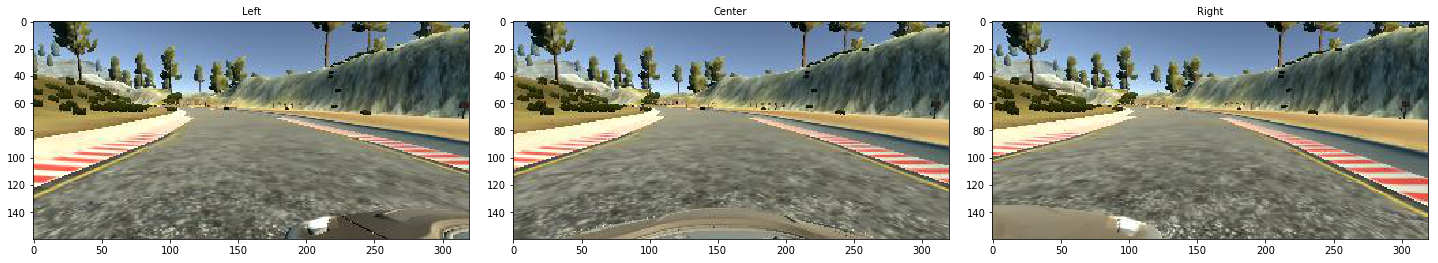

#### Using Mirror Images
The track is a contant set of left turns (Anticlockwise) and rigth turns (Clockwise). Thus when we drive on this track we are making the model biased towards one side of the turn. Yes driving both ways means we teach teh car to turn both left and right. But while driving Anticlockwise considering the array of images we only teach it to turn left. 

Thus I mirrored all the data images adn reversed the steering angles for them to also teach the car to turn in the other direction. This again doubled the dataset. 

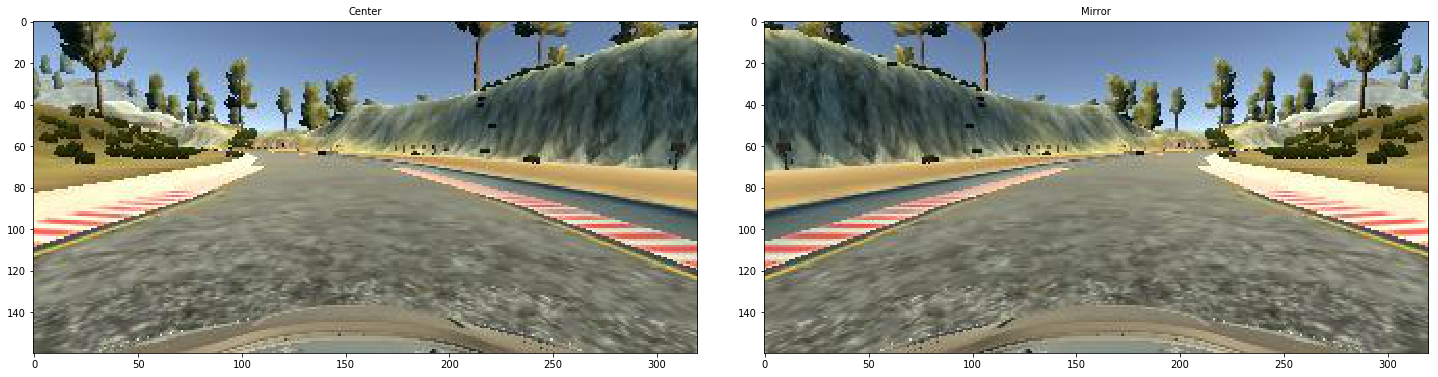

Thus the dataset was multiplied by 6 to teach the car different features required.




## Model Architecture Used

A convolution Neurral network with a flatten nural network with one output node was used to train the model. 

The data was first Noralized adn mean centered so taht any features that were biased in teh data do not affect the learning too much.

The image was then cropped to only look at the road and remove the part of the image that looks at the trees and the sky. 

The CNN is made up of 4 Convolution Layers with Relu Activation and Max Pooling at every stage. 

The filter sizze for the first two layers is 5X5 and the filter size for the last two layers is 3X3

The depth begins at 3 for the image and then is increased to 6 then 18 then 36 and finally 48 by the final layer. 

### Overfitting

A dropout layer was added after the final convolution layer to ensure we do not overfit tot he data. I had initially added dropouts to every layer and was running into significant issues with learning the features and thus kept decreasing the number of dropout layers until this configuration gave me the desired result.

After this we have a flat Neural network going from 512 - 256 - 128 - 32 - 1 nodes. The output of this is the steering angle of the car.


## Training the model on the data 

The data is split into a training set and a validation set. 

### Model parameter Tuning
An adam optimiser is then used to train the model and get the necessary output.
The model was then saved and used to drive the Simulator on the local machine. 

## Architecture and training documentation

Most of the following three rubrics has been covered in the section above. Some of the portions missing are as follows.

### Steps followed to complete the project
1. Using the Udacity simulator drive in training mode to generate a rough dataset
2. Set up AWS Account and learn the basic of using an instance
3. Upload teh first rought data set and try and setup a pipeline to train the model on AWS. Download the model and then drive the simulator in autonomous mode on the local machine.
4. Once the pipeline was ready, I was able to concentrate on finetuning the various aspects of the project.
5. Began by preprocessing the data - Such as Normalization and mean centering.
6. Also cropped images to only look at teh road and not the sky and the trees
7. Beginning with the Lenet architecture to determine if it is good in recognizing and driving the vehicle. 
8. As part of the model to combat overfitting I added Dropout layers. i began with dropout layers after every CNN but this model struggled to elarn the features. I then moved on to adding lesser dn lesser dropouts until I reached the architecture discussed above.
9. Tried more powerful netork structures and used a variation of the network created by Nvidia
10. All the trainig was done on a random split of only 80 percent of the data adn teh finl 20% was used for validation
11. Ultimately this model was saved and then used to run the simulator in autonomous mode

### The other Rubric points regarding the model architecture adn teh training data are provided in the section above


## Simulation

Run the cells below to see the video Output. The Video is also in the submission folder.

In [4]:
project_output = 'run1.mp4'
from moviepy.editor import VideoFileClip
from IPython.display import HTML

HTML("""
<video width="320" height="160" controls>
  <source src="{0}">
</video>
""".format(project_output))